In [15]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

* Column-1: PubMed-ID
* Column-2: Sentence 
* Column-3: Adverse-Effect
* Column-4: Begin offset of Adverse-Effect at 'document level'
* Column-5: End offset of Adverse-Effect at 'document level'
* Column-6: Drug
* Column-7: Begin offset of Drug at 'document level'
* Column-8: End offset of Drug at 'document level'

In [3]:
# https://sites.google.com/site/adecorpus/
drug_ae=pd.read_csv("/mnt/c/Users/joaof/Downloads/ADE-Corpus-V2/DRUG-AE.rel",sep="|",header=None)
drug_ae.columns=["pubmedId","sentence","ADE","begin_offset_ade","end_offset_ade","drug","begin_offset_drug","end_offset_drug"]
drug_ae.head(3)

,pubmedId,sentence,ADE,begin_offset_ade,end_offset_ade,drug,begin_offset_drug,end_offset_drug
0,10030778,Intravenous azithromycin-induced ototoxicity.,ototoxicity,43,54,azithromycin,22,34
1,10048291,"Immobilization, while Paget's bone disease was...",increased calcium-release,960,985,dihydrotachysterol,908,926
2,10048291,Unaccountable severe hypercalcemia in a patien...,hypercalcemia,31,44,dihydrotachysterol,94,112


In [4]:
drug_neg=pd.read_csv("/mnt/c/Users/joaof/Downloads/ADE-Corpus-V2/ADE-NEG.txt",sep="|",header=None)
drug_neg["pubmedId"]=drug_neg[0].apply(lambda x: x.split()[0])
drug_neg["sentence"]=drug_neg[0].apply(lambda x: " ".join(x.split()[2:]))
drug_neg.drop(columns=[0],inplace=True)

In [5]:
drug_neg

,pubmedId,sentence
0,6460590,Clioquinol intoxication occurring in the treat...
1,8600337,"""Retinoic acid syndrome"" was prevented with sh..."
2,8402502,BACKGROUND: External beam radiation therapy of...
3,8700794,"Although the enuresis ceased, she developed th..."
4,17662448,A 42-year-old woman had uneventful bilateral l...
...,...,...
16690,946400,"At autopsy, the liver was found to be small, s..."
16691,16416684,"Physical exam revealed a patient with aphasia,..."
16692,7351000,At the time when the leukemia appeared seven o...
16693,19769520,The American Society for Regional Anesthesia a...


In [6]:
drug_neg[~drug_neg["pubmedId"].isin(drug_ae["pubmedId"])].dropna()

,pubmedId,sentence
0,6460590,Clioquinol intoxication occurring in the treat...
1,8600337,"""Retinoic acid syndrome"" was prevented with sh..."
2,8402502,BACKGROUND: External beam radiation therapy of...
3,8700794,"Although the enuresis ceased, she developed th..."
4,17662448,A 42-year-old woman had uneventful bilateral l...
...,...,...
16690,946400,"At autopsy, the liver was found to be small, s..."
16691,16416684,"Physical exam revealed a patient with aphasia,..."
16692,7351000,At the time when the leukemia appeared seven o...
16693,19769520,The American Society for Regional Anesthesia a...


In [152]:
_,drug_neg_small=train_test_split(drug_neg,test_size=0.1)
drug_neg_small

,pubmedId,sentence
13444,16368918,Prior to beginning therapy with these antiretr...
3656,9106383,They discuss related literature reports of man...
7226,7880678,Both procedures were uncomplicated until about...
4794,15685264,Adding Dantrolene and Oxybutynin elevated the ...
8865,18221983,Use of tumor necrosis factor-alpha inhibitors ...
...,...,...
12056,2483959,In this patient a single plasma exchange was s...
10750,11225532,"Three days later, he presented with evidence o..."
3373,16968538,CASE PRESENTATION: A 52-year-old-male was admi...
14541,7554306,"However, physicians must keep in mind the sign..."


In [170]:
full=pd.concat([drug_neg[["pubmedId","sentence"]].assign(target=0),drug_ae[["pubmedId","sentence"]].assign(target=1)])
full_small=pd.concat([drug_neg_small[["pubmedId","sentence"]].assign(target=0),drug_ae[["pubmedId","sentence"]].assign(target=1)])

In [8]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23516 entries, 0 to 6820
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pubmedId  23516 non-null  object
 1   sentence  23516 non-null  object
 2   target    23516 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 734.9+ KB


In [156]:
full_small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8491 entries, 13444 to 6820
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pubmedId  8491 non-null   object
 1   sentence  8491 non-null   object
 2   target    8491 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 265.3+ KB


In [9]:
full.duplicated().sum()

2556

In [10]:
full.drop_duplicates(inplace=True)

In [11]:
full.head(5)

,pubmedId,sentence,target
0,6460590,Clioquinol intoxication occurring in the treat...,0
1,8600337,"""Retinoic acid syndrome"" was prevented with sh...",0
2,8402502,BACKGROUND: External beam radiation therapy of...,0
3,8700794,"Although the enuresis ceased, she developed th...",0
4,17662448,A 42-year-old woman had uneventful bilateral l...,0


In [173]:
_,s1=train_test_split(full,test_size=0.1,stratify=full["target"])
_,s2=train_test_split(full_small,test_size=0.08,stratify=full_small["target"])
s1.info(),s2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2352 entries, 5449 to 6587
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pubmedId  2352 non-null   object
 1   sentence  2352 non-null   object
 2   target    2352 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 73.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 680 entries, 5952 to 2159
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pubmedId  680 non-null    object
 1   sentence  680 non-null    object
 2   target    680 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 21.2+ KB


(None, None)

In [3]:
s1=pd.read_csv("abstract_small_balanced.csv")

In [177]:
s1["target"].value_counts(),s2["target"].value_counts()

(0    1670
 1     682
 Name: target, dtype: int64,
 1    546
 0    134
 Name: target, dtype: int64)

In [178]:
%%time
import time
i=0
fetch = PubMedFetcher()
def get_abstract(row):
    global i
    global fetch
    i+=1
    try:
        article = fetch.article_by_pmid(row["pubmedId"])
        time.sleep(0.1)
        return article.abstract
    except:
        return "none"
#s1.loc[:,"abstract"]=s1.apply(get_abstract,axis=1)
s2.loc[:,"abstract"]=s2.apply(get_abstract,axis=1)

CPU times: user 24.9 s, sys: 795 ms, total: 25.7 s
Wall time: 10min 23s


/home/john/.conda/envs/pubmed/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/john/.conda/envs/pubmed/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [179]:
%%time
s2
s2.to_csv("abstract_small_balanced.csv",index=False)


CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 10.3 µs


,pubmedId,sentence,target,abstract
5952,8700794,When vague symptoms develop during desmopressi...,1,"Desmopressin is a commonly used, well-tolerate..."
4894,6221046,Multiple complications of propylthiouracil tre...,1,"An association of granulocytopenia, eosinophil..."
5656,8192712,Hyperammonemia secondary to valproic acid as a...,1,Hyperammonemia has been described as a complic...
4286,2924444,Acute myocardial infarction due to coronary sp...,1,A 63-year-old man with hypothyroidism is descr...
5985,8742573,CASE: We report a case of a woman with severe ...,1,OBJECTIVE: To evaluate the efficacy of the adm...
...,...,...,...,...
2089,11319599,Fungal arthritis and osteomyelitis are rare an...,0,Fungal arthritis and osteomyelitis are rare an...
4102,2332596,Phenobarbital hepatotoxicity in an 8-month-old...,1,Severe hepatotoxicity from phenobarbital occur...
102,10467499,"A 22-year-old black man developed fever, chill...",1,"A 22-year-old black man developed fever, chill..."
3874,20110001,Flare of Kaposi's sarcoma (KS) is well describ...,1,BACKGROUND: Chronic myeloid leukemia (CML) is ...


In [354]:
from sklearn.model_selection import train_test_split
abstracts = s2['abstract']
y = s2['target']

abstract_train, abstract_test, abstract_y_train, abstract_y_test = train_test_split(abstracts, y, test_size=0.20, random_state=1000)
print(abstract_train.shape,abstract_test.shape,y_train.shape,y_test.shape)

(544,) (136,) (18812,) (4704,)


In [212]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk import word_tokenize
word_tokenize('This should be tokenized. 02/02/2018 sentence has stars**')

[nltk_data] Downloading package punkt to /home/john/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/john/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/john/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['This',
 'should',
 'be',
 'tokenized',
 '.',
 '02/02/2018',
 'sentence',
 'has',
 'stars',
 '*',
 '*']

In [181]:
import string
def tokenizer_better(text):
    # tokenize the text by replacing punctuation and numbers with spaces and lowercase all words
    
    punc_list = string.punctuation+'0123456789'
    t = str.maketrans(dict.fromkeys(punc_list, " "))
    text = text.lower().translate(t)
    tokens = word_tokenize(text)
    return tokens
tokenizer_better('This should be tokenized. 02/02/2018 sentence has stars** token sentences')

['this',
 'should',
 'be',
 'tokenized',
 'sentence',
 'has',
 'stars',
 'token',
 'sentences']

In [229]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize 
from nltk.stem.snowball import SnowballStemmer


class LemmaTokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

class StemTokenizer:
    def __init__(self):
        self.ps = PorterStemmer()
    def __call__(self, doc):
        return [self.ps.stem(t) for t in tokenizer_better(doc)]

stemmer = SnowballStemmer("english", ignore_stopwords=True)
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])
stemmed_count_vect = StemmedCountVectorizer(stop_words='english')


In [248]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words="english",tokenizer=StemTokenizer())
vectorizer = StemmedCountVectorizer(stop_words='english',tokenizer=tokenizer_better)

vectorizer.fit(abstract_train)
X_train = vectorizer.transform(abstract_train)
X_test  = vectorizer.transform(abstract_test)
X_train

/home/john/.conda/envs/pubmed/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


<544x5030 sparse matrix of type '<class 'numpy.int64'>'
	with 32308 stored elements in Compressed Sparse Row format>

In [250]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train)
X_train_tfidf.shape
X_test_tfidf= tfidf_transformer.transform(X_test)

In [251]:
#As an alternative to mean-centering and scaling,
# you can try per-sample normalization with sklearn.preprocessing.Normalizer;
# this is appropriate for frequency features (e.g. in text classification).
from sklearn.preprocessing import Normalizer
normalizer = Normalizer().fit(X_train_tfidf)  # fit does nothing
x_normalized=normalizer.transform(X_train_tfidf)
x_test_normalized=normalizer.transform(X_test_tfidf)

In [252]:
y_test.value_counts()

1    111
0     25
Name: target, dtype: int64

In [253]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(x_normalized, y_train)
predicted = clf.predict(x_test_normalized)

confusion_matrix(y_test,predicted)#horrible

array([[  0,  25],
       [  0, 111]])

In [255]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold

cv=RepeatedStratifiedKFold(n_splits=3,random_state=42,n_repeats=3)
classifier = LogisticRegression()
classifier.fit(x_normalized, y_train)
score=cross_validate(classifier,x_test_normalized, y_test,cv=cv,scoring=["accuracy","f1","precision","recall","roc_auc"])

In [256]:
print(f" Accuracy: {score['test_accuracy'].mean()}\n F1: {score['test_f1'].mean()}\n Precision: {score['test_precision'].mean()}\n Recall: {score['test_recall'].mean()}\n AUC: {score['test_roc_auc'].mean()}\n ")

 Accuracy: 0.8162640901771335
 F1: 0.898814771280243
 Precision: 0.8162640901771335
 Recall: 1.0
 AUC: 0.537203870537204
 


In [257]:
from sklearn.metrics import confusion_matrix

y_preds=classifier.predict(x_test_normalized)

confusion_matrix(y_test,y_preds)

array([[  0,  25],
       [  0, 111]])

In [258]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_normalized, y_train)
svm_score=cross_validate(svm,x_test_normalized, y_test,cv=cv,scoring=["accuracy","f1","precision","recall"])

In [259]:
print(f" Accuracy: {svm_score['test_accuracy'].mean()}\n F1: {svm_score['test_f1'].mean()}\n Precision: {svm_score['test_precision'].mean()}\n Recall: {svm_score['test_recall'].mean()}\n")

 Accuracy: 0.8162640901771335
 F1: 0.898814771280243
 Precision: 0.8162640901771335
 Recall: 1.0



In [260]:
from sklearn.metrics import confusion_matrix

y_preds=svm.predict(x_test_normalized)

confusion_matrix(y_test,y_preds)

array([[  1,  24],
       [  0, 111]])

In [288]:
#grid search
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf','sigmoid'), 'C':[0.01,0.05,0.2]}
svc2 = SVC()
clf_s = GridSearchCV(svc2, parameters,cv=cv,scoring="roc_auc")
clf_s.fit(x_normalized, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=3, random_state=42),
             estimator=SVC(),
             param_grid={'C': [0.01, 0.05, 0.2],
                         'kernel': ('linear', 'rbf', 'sigmoid')},
             scoring='roc_auc')

In [291]:
grid_result=pd.DataFrame(clf_s.cv_results_)
grid_result.head(3)
clf_s.best_estimator_

SVC(C=0.05, kernel='sigmoid')

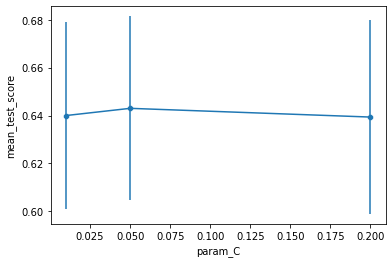

In [320]:
import seaborn as sns
ax=sns.scatterplot(data=grid_result[grid_result["param_kernel"]=="linear"], x="param_C", y="mean_test_score");
ax.errorbar(grid_result[grid_result["param_kernel"]=="linear"]["param_C"], grid_result[grid_result["param_kernel"]=="linear"]["mean_test_score"], yerr=grid_result[grid_result["param_kernel"]=="linear"]["std_test_score"]);

In [300]:
grid_result.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_kernel', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'split5_test_score', 'split6_test_score',
       'split7_test_score', 'split8_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [303]:
import numpy as np

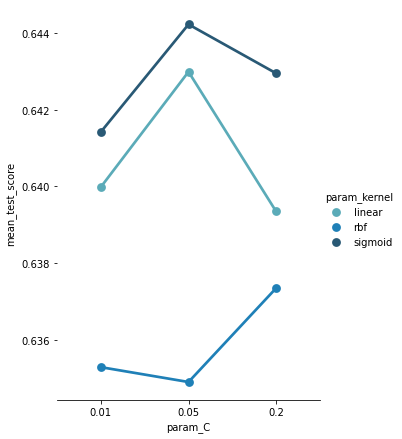

In [311]:
# Draw a nested boxplot to show bills by day and time
# sns.boxplot(x="param_C", y="mean_test_score",
#             hue="param_kernel", palette=["m", "g"],
#             data=grid_result);
# Draw a pointplot to show pulse as a function of three categorical factors
g = sns.catplot(x="param_C", y="mean_test_score", hue="param_kernel", 
                capsize=.2, palette="YlGnBu_d", height=6, aspect=.75,
                kind="point", data=grid_result)
g.despine(left=True)

In [297]:
from sklearn.svm import SVC
svm2 = SVC(C=0.2,kernel="linear")
svm2.fit(x_normalized, y_train)
svm_score2=cross_validate(svm2,x_test_normalized, y_test,cv=cv,scoring=["accuracy","f1","precision","recall","roc_auc"])
y_preds2=svm2.predict(x_test_normalized)
print(f" Accuracy: {svm_score2['test_accuracy'].mean()}\n F1: {svm_score2['test_f1'].mean()}\n Precision: {svm_score2['test_precision'].mean()}\n Recall: {svm_score2['test_recall'].mean()}\n AUC: {svm_score2['test_roc_auc'].mean()}\n")
confusion_matrix(y_test,y_preds2)

 Accuracy: 0.8162640901771335
 F1: 0.898814771280243
 Precision: 0.8162640901771335
 Recall: 1.0
 AUC: 0.5260677344010678



array([[  0,  25],
       [  0, 111]])

## BY SENTENCES

In [347]:
from sklearn.model_selection import train_test_split

sentences = full['sentence']
y = full['target']

sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.20, random_state=1000)

In [348]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)
X_train

<18812x15928 sparse matrix of type '<class 'numpy.int64'>'
	with 319159 stored elements in Compressed Sparse Row format>

In [349]:
#As an alternative to mean-centering and scaling,
# you can try per-sample normalization with sklearn.preprocessing.Normalizer;
# this is appropriate for frequency features (e.g. in text classification).
from sklearn.preprocessing import Normalizer
normalizer = Normalizer().fit(X_train)  # fit does nothing
x_normalized=normalizer.transform(X_train)
x_test_normalized=normalizer.transform(X_test)

In [350]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold

cv=RepeatedStratifiedKFold(n_splits=20,random_state=42,n_repeats=3)
classifier = LogisticRegression()
classifier.fit(x_normalized, y_train)
score=cross_validate(classifier,x_test_normalized, y_test,cv=cv,scoring=["accuracy","f1","precision","recall","roc_auc"])

In [362]:
print(f" Accuracy: {score['test_accuracy'].mean()}\n F1: {score['test_f1'].mean()}\n Precision: {score['test_precision'].mean()}\n Recall: {score['test_recall'].mean()}\n ROC_AUC: {score['test_roc_auc'].mean()}")

 Accuracy: 0.8178149416997234
 F1: 0.6408267944327338
 Precision: 0.8071028531115566
 Recall: 0.5335648148148148
 ROC_AUC: 0.8852858586740263


In [364]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_normalized, y_train)
svm_score=cross_validate(svm,x_test_normalized, y_test,cv=cv,scoring=["accuracy","f1","precision","recall","roc_auc"])

In [365]:
print(f" Accuracy: {svm_score['test_accuracy'].mean()}\n F1: {svm_score['test_f1'].mean()}\n Precision: {svm_score['test_precision'].mean()}\n Recall: {svm_score['test_recall'].mean()}\n ROC_AUC: {svm_score['test_roc_auc'].mean()}")

 Accuracy: 0.848287955283087
 F1: 0.7100737134017361
 Precision: 0.8542009316777688
 Recall: 0.6099537037037037
 ROC_AUC: 0.9084712852816157


In [366]:
from sklearn.metrics import confusion_matrix

svc_y_preds=svm.predict(x_test_normalized)

confusion_matrix(y_test,svc_y_preds)

array([[3145,  119],
       [ 342, 1098]])

In [374]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_normalized, y_train)
rf_score=cross_validate(rf,x_test_normalized, y_test,cv=cv,scoring=["accuracy","f1","precision","recall","roc_auc"])

In [375]:
print(f" Accuracy: {rf_score['test_accuracy'].mean()}\n F1: {rf_score['test_f1'].mean()}\n Precision: {rf_score['test_precision'].mean()}\n Recall: {rf_score['test_recall'].mean()}\n ROC_AUC: {rf_score['test_roc_auc'].mean()}")

 Accuracy: 0.8261816324077411
 F1: 0.6288026176537641
 Precision: 0.9041458794037525
 Recall: 0.48495370370370366
 ROC_AUC: 0.8973144745027462


In [381]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB().fit(x_normalized, y_train)
mnb_score=cross_validate(mnb,x_test_normalized, y_test,cv=cv,scoring=["accuracy","f1","precision","recall","roc_auc"])

/home/john/.conda/envs/pubmed/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [382]:
print(f" Accuracy: {mnb_score['test_accuracy'].mean()}\n F1: {mnb_score['test_f1'].mean()}\n Precision: {mnb_score['test_precision'].mean()}\n Recall: {mnb_score['test_recall'].mean()}\n ROC_AUC: {mnb_score['test_roc_auc'].mean()}")

 Accuracy: 0.7162687823055657
 F1: 0.1397663370290596
 Precision: 0.9506740019240019
 Recall: 0.07638888888888888
 ROC_AUC: 0.8272721675644671


In [422]:
from keras.models import Sequential
from keras import layers

x_nn_normalized=normalizer.transform(X_train).toarray()
x_nn_test_normalized=normalizer.transform(X_test).toarray()

input_dim = x_normalized.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', 
               optimizer='adam', 
               metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                159290    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 159,301
Trainable params: 159,301
Non-trainable params: 0
_________________________________________________________________


In [433]:
history = model.fit(x_normalized, y_train,
                     epochs=100,
                     verbose=False,
                    validation_data=(x_test_normalized, y_test),
                     batch_size=10)

In [434]:
loss, accuracy = model.evaluate(x_normalized, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(x_test_normalized, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 1.0000
Testing Accuracy:  0.8701


In [436]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

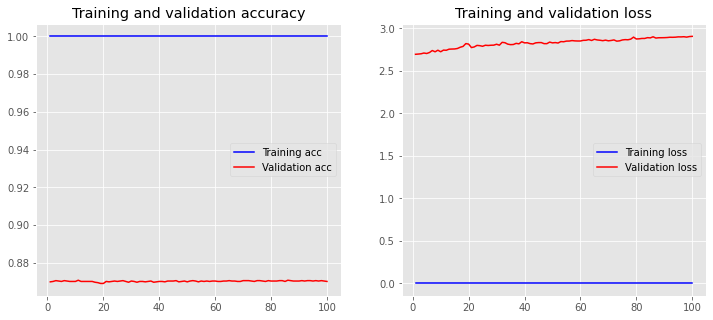

In [437]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
plot_history(history)

### train sentences model and apply to abstracts

In [355]:
#created X_test from abstracts;
x_test_vect=vectorizer.transform(abstract_test)
x_test_vec_normalized=normalizer.transform(x_test_vect)
y_preds_abs=classifier.predict(x_test_vec_normalized)

confusion_matrix(abstract_y_test,y_preds_abs)

array([[21,  4],
       [31, 80]])

In [371]:
from sklearn.metrics import roc_auc_score,precision_score,accuracy_score,recall_score,f1_score
roc_auc_score(abstract_y_test,y_preds_abs),precision_score(abstract_y_test,y_preds_abs),accuracy_score(abstract_y_test,y_preds_abs),f1_score(abstract_y_test,y_preds_abs)

(0.7803603603603603,
 0.9523809523809523,
 0.7426470588235294,
 0.8205128205128205)

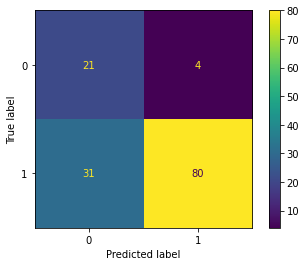

In [372]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier,x_test_vec_normalized,abstract_y_test);

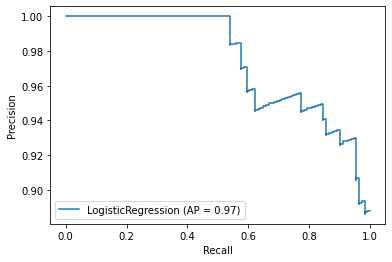

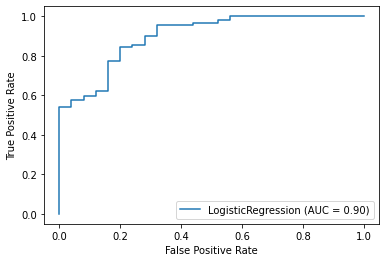

In [373]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

plot_precision_recall_curve(classifier,x_test_vec_normalized,abstract_y_test);
plot_roc_curve(classifier,x_test_vec_normalized,abstract_y_test);

### SVM

In [367]:
##svc
#created X_test from abstracts;

svc_y_preds_abs=svm.predict(x_test_vec_normalized)

confusion_matrix(abstract_y_test,svc_y_preds_abs)

array([[21,  4],
       [26, 85]])

In [368]:
from sklearn.metrics import roc_auc_score,precision_score,accuracy_score,recall_score,f1_score
roc_auc_score(abstract_y_test,svc_y_preds_abs),precision_score(abstract_y_test,svc_y_preds_abs),accuracy_score(abstract_y_test,svc_y_preds_abs),f1_score(abstract_y_test,svc_y_preds_abs)

(0.8028828828828829, 0.9550561797752809, 0.7794117647058824, 0.85)

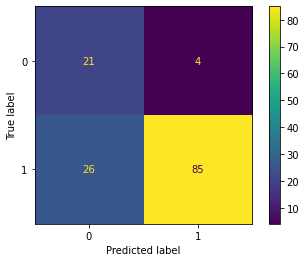

In [369]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svm,x_test_vec_normalized,abstract_y_test);

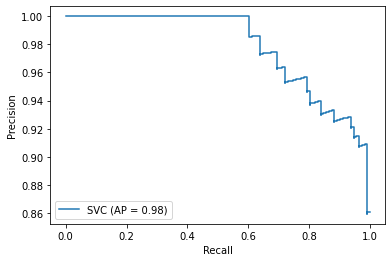

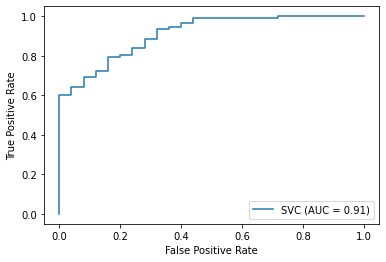

In [370]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

plot_precision_recall_curve(svm,x_test_vec_normalized,abstract_y_test);
plot_roc_curve(svm,x_test_vec_normalized,abstract_y_test);

### Random Forest

In [376]:
rf_y_preds_abs=rf.predict(x_test_vec_normalized)

confusion_matrix(abstract_y_test,rf_y_preds_abs)

array([[25,  0],
       [93, 18]])

In [445]:
from sklearn.metrics import roc_auc_score,precision_score,accuracy_score,recall_score,f1_score
roc_auc_score(abstract_y_test,rf_y_preds_abs),precision_score(abstract_y_test,rf_y_preds_abs),accuracy_score(abstract_y_test,rf_y_preds_abs),f1_score(abstract_y_test,rf_y_preds_abs)

(0.5810810810810811, 1.0, 0.3161764705882353, 0.27906976744186046)

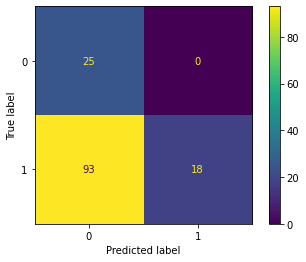

In [377]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf,x_test_vec_normalized,abstract_y_test);

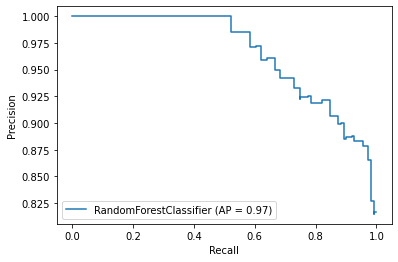

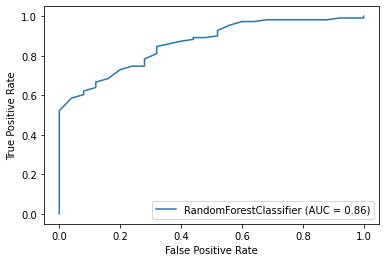

In [378]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

plot_precision_recall_curve(rf,x_test_vec_normalized,abstract_y_test);
plot_roc_curve(rf,x_test_vec_normalized,abstract_y_test);

### Bayes

In [439]:
##svc
#created X_test from abstracts;

mnb_y_preds_abs=mnb.predict(x_test_vec_normalized)

confusion_matrix(abstract_y_test,mnb_y_preds_abs)

array([[ 25,   0],
       [110,   1]])

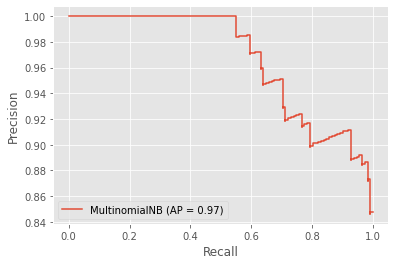

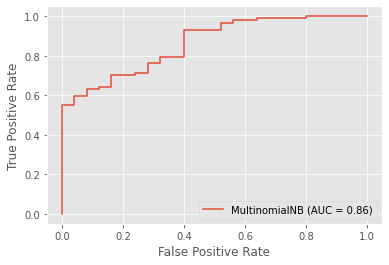

In [440]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

plot_precision_recall_curve(mnb,x_test_vec_normalized,abstract_y_test);
plot_roc_curve(mnb,x_test_vec_normalized,abstract_y_test);

### Keras

In [443]:
keras_y_preds=model.predict_classes(x_test_vec_normalized)
confusion_matrix(abstract_y_test,keras_y_preds)

array([[20,  5],
       [29, 82]])

In [446]:
roc_auc_score(abstract_y_test,keras_y_preds),precision_score(abstract_y_test,keras_y_preds),accuracy_score(abstract_y_test,keras_y_preds),f1_score(abstract_y_test,keras_y_preds)

(0.7693693693693694, 0.9425287356321839, 0.75, 0.8282828282828283)

### Saving models

In [447]:
import pickle

pkl_filename = "svm.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(svm, file)

In [448]:
pkl_filename = "linear_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(classifier, file)

## Entity recognition

In [1]:
import spacy

med7 = spacy.load("en_core_med7_lg")

# create distinct colours for labels
col_dict = {}
seven_colours = ['#e6194B', '#3cb44b', '#ffe119', '#ffd8b1', '#f58231', '#f032e6', '#42d4f4']
for label, colour in zip(med7.pipe_labels['ner'], seven_colours):
    col_dict[label] = colour

options = {'ents': med7.pipe_labels['ner'], 'colors':col_dict}

text = 'A patient was prescribed Magnesium hydroxide 400mg/5ml suspension PO of total 30ml bid for the next 5 days.'
doc = med7(text)

spacy.displacy.render(doc, style='ent', jupyter=True, options=options)

[(ent.text, ent.label_) for ent in doc.ents]

[('Magnesium hydroxide', 'DRUG'),
 ('400mg/5ml', 'DOSAGE'),
 ('suspension', 'FORM'),
 ('PO', 'ROUTE'),
 ('30ml', 'DOSAGE'),
 ('bid', 'FREQUENCY'),
 ('for the next 5 days', 'DURATION')]

In [12]:
abstrasct_test=s1.iloc[0,3]
doc = med7(abstrasct_test)

#spacy.displacy.render(doc, style='ent', jupyter=True, options=options)

[(ent.text, ent.label_) for ent in doc.ents].unique()

AttributeError: 'list' object has no attribute 'unique'

In [23]:
s1

,pubmedId,sentence,target,abstract
0,8700794,When vague symptoms develop during desmopressi...,1,"Desmopressin is a commonly used, well-tolerate..."
1,6221046,Multiple complications of propylthiouracil tre...,1,"An association of granulocytopenia, eosinophil..."
2,8192712,Hyperammonemia secondary to valproic acid as a...,1,Hyperammonemia has been described as a complic...
3,2924444,Acute myocardial infarction due to coronary sp...,1,A 63-year-old man with hypothyroidism is descr...
4,8742573,CASE: We report a case of a woman with severe ...,1,OBJECTIVE: To evaluate the efficacy of the adm...
...,...,...,...,...
675,11319599,Fungal arthritis and osteomyelitis are rare an...,0,Fungal arthritis and osteomyelitis are rare an...
676,2332596,Phenobarbital hepatotoxicity in an 8-month-old...,1,Severe hepatotoxicity from phenobarbital occur...
677,10467499,"A 22-year-old black man developed fever, chill...",1,"A 22-year-old black man developed fever, chill..."
678,20110001,Flare of Kaposi's sarcoma (KS) is well describ...,1,BACKGROUND: Chronic myeloid leukemia (CML) is ...


In [24]:
###geting info from abstract
def get_entities(abstract):
    doc=med7(abstract)
    unique=[(ent.text.lower(), ent.label_) for ent in doc.ents]
    return list(set(unique)) 
get_entities(abstrasct_test)
s1["entities"]=s1["abstract"].apply(get_entities)

,pubmedId,sentence,target,abstract,entities
0,8700794,When vague symptoms develop during desmopressi...,1,"Desmopressin is a commonly used, well-tolerate...","[(intravenous, ROUTE), (fluids, DRUG), (intran..."
1,6221046,Multiple complications of propylthiouracil tre...,1,"An association of granulocytopenia, eosinophil...","[(propylthiouracil, DRUG), (ptu, DRUG)]"
2,8192712,Hyperammonemia secondary to valproic acid as a...,1,Hyperammonemia has been described as a complic...,"[(valproic acid, DRUG)]"
3,2924444,Acute myocardial infarction due to coronary sp...,1,A 63-year-old man with hypothyroidism is descr...,"[(l-thyroxine, DRUG)]"
4,8742573,CASE: We report a case of a woman with severe ...,1,OBJECTIVE: To evaluate the efficacy of the adm...,"[(insulin, DRUG)]"
...,...,...,...,...,...
675,11319599,Fungal arthritis and osteomyelitis are rare an...,0,Fungal arthritis and osteomyelitis are rare an...,"[(fludarabine, DRUG), (cyclosporine, DRUG), (s..."
676,2332596,Phenobarbital hepatotoxicity in an 8-month-old...,1,Severe hepatotoxicity from phenobarbital occur...,"[(phenobarbital, DRUG)]"
677,10467499,"A 22-year-old black man developed fever, chill...",1,"A 22-year-old black man developed fever, chill...","[(systemic corticosteroids, DRUG), (minocyclin..."
678,20110001,Flare of Kaposi's sarcoma (KS) is well describ...,1,BACKGROUND: Chronic myeloid leukemia (CML) is ...,"[(tyrosine kinase inhibitors, DRUG), (imatinib..."
